https://leetcode.com/problems/find-if-path-exists-in-graph/description/?envType=daily-question&envId=2024-04-21

1971. Find if Path Exists in Graph
Easy
Topics
Companies

There is a bi-directional graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive). The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [ui, vi] denotes a bi-directional edge between vertex ui and vertex vi. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.

You want to determine if there is a valid path that exists from vertex source to vertex destination.

Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.

 

Example 1:

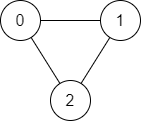

Input: n = 3, edges = [[0,1],[1,2],[2,0]], source = 0, destination = 2
Output: true
Explanation: There are two paths from vertex 0 to vertex 2:
- 0 → 1 → 2
- 0 → 2

Example 2:

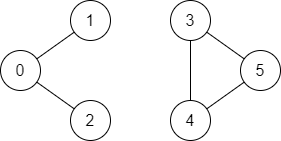

Input: n = 6, edges = [[0,1],[0,2],[3,5],[5,4],[4,3]], source = 0, destination = 5
Output: false
Explanation: There is no path from vertex 0 to vertex 5.

 

Constraints:

    1 <= n <= 2 * 105
    0 <= edges.length <= 2 * 105
    edges[i].length == 2
    0 <= ui, vi <= n - 1
    ui != vi
    0 <= source, destination <= n - 1
    There are no duplicate edges.
    There are no self edges.



### idea is to move backwards, start at end, get all edges you can visit from there. if not goal then note where weve been and see where other new points can go. 

In [73]:
class Solution:
    def validPath(self, n: int, edges, source: int, destination: int) -> bool:
        self.visited = set()
        self.edge = edges
        self.path = False
        if source == destination:
            return True
        self.back(vert = source, dest = destination, n = n)
        return self.path

    def back(self, vert: int, dest: int, n : int):
        self.visited.add(vert)
        poss = [x[1 if x[0] == vert else 0] for x in self.edge if (vert in x and set(x) - self.visited != set())]
        if dest in poss:
            self.path = True
            return
        if len(self.visited) == n:
            self.path = False
            return
        for i in poss:
            self.back(vert = i, dest = dest, n = n)

In [75]:
n = 3
edges = [[0,1],[1,2]]
source = 0
destination = 2
Solution().validPath(n, edges, source, destination)

True

In [76]:
n = 10
edges = [[4,3],[1,4],[4,8],[1,7],[6,4],[4,2],[7,4],[4,0],[0,9],[5,4]]
source = 5
destination = 9
print(Solution().validPath(n, edges, source, destination))

True


i think this would work but it failed on time, likely because its a depth first. will alter to remove edges that belong to items already traversed, hopefully speed it up. if not will change to breadth first instead of depth first


In [77]:
class Solution2:
    def validPath(self, n: int, edges, source: int, destination: int) -> bool:
        self.visited = set()
        self.edge = edges
        self.path = False
        if source == destination:
            return True
        self.back(vert = source, dest = destination, n = n)
        return self.path

    def back(self, vert: int, dest: int, n : int):
        self.visited.add(vert)
        poss = [x[1 if x[0] == vert else 0] for x in self.edge if (vert in x and set(x) - self.visited != set())]
        self.edge = [x for x in self.edge if set(x) - self.visited != set()]
        if dest in poss:
            self.path = True
            return
        if len(self.visited) == n:
            self.path = False
            return
        for i in poss:
            self.back(vert = i, dest = dest, n = n)

In [80]:
n = 3
edges = [[0,1],[1,2]]
source = 0
destination = 3
Solution2().validPath(n, edges, source, destination)

False

In [81]:
n = 10
edges = [[4,3],[1,4],[4,8],[1,7],[6,4],[4,2],[7,4],[4,0],[0,9],[5,4]]
source = 5
destination = 6
print(Solution2().validPath(n, edges, source, destination))

True


it wasnt fast but was accepted, will change to breadth first anyway just to make quick

In [108]:
class Solution:
    def validPath(self, n: int, edges, source: int, destination: int) -> bool:
        self.visited = set()
        self.queue = []
        self.edge = edges
        self.path = False
        if source == destination:
            return True
        self.back(vert = source, dest = destination, n = n)
        return self.path

    def back(self, vert: int, dest: int, n : int):
        self.visited.add(vert)
        self.queue = self.queue + [x[1 if x[0] == vert else 0] for x in self.edge if (vert in x and x[1 if x[0] == vert else 0] not in self.queue)]
        self.edge = [x for x in self.edge if set(x) - self.visited != set()]
        if self.queue == []:
            return
        if dest in self.queue:
            self.path = True
            return
        if len(self.visited) == n:
            return
        a = self.queue[0]
        self.queue.remove(a)
        self.back(vert = a, dest = dest, n = n)

this isnt much faster, great on memory though